# 15 UNDERSTANDING EXPERIMENTAL DATA

This chapter is all about <b>understanding experimental data</b>. 

We will make extensive use of plotting to visualize the data, and will return to the topic of what is and what is not a valid statistical conclusion. We will also talk about the interplay between physical and computational experiments.

## 15.1 The Behavior of Springs

Springs are wonderful things. 

In 1676 the British physicist Robert Hooke formulated <b>Hooke’s law</b> of elasticity: Ut tensio, sic vis, in English,

`F = -kx`

All springs have an <b>elastic limit</b>, beyond which the law fails. 

The constant of proportionality, `k`, is called <b>the spring constant</b>.

Knowing the <b>spring constant</b> of a particular spring can be <b>a matter of some import</b>

Generations of physics students have learned to estimate spring constants using an experimental apparatus similar to that pictured here. 

The basic idea is toestimate the force stored in the spring by <b>measuring the displacement caused by exerting a known force on the spring</b>.

<img src="./img/spring.PNG"/> 

In [1]:
#Page 209, Figure 15.1
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, m = line.split(' ')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

In [ ]:
The function in Figure 15.2 uses getData to extract the experimental data from  the file and then plots it.

Plotting the data

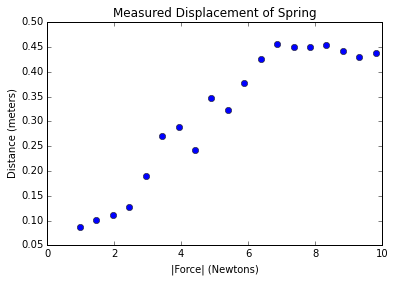

In [4]:
%matplotlib inline
import pylab
#Page 209, Figure 15.2
def plotData(inputFile):
    masses, distances = getData(inputFile)
    masses = pylab.array(masses)
    distances = pylab.array(distances)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo',
               label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
plotData('springData.txt')

This is not what Hooke’s law predicts

Measurement error is to be expected, so we should expect the points to lie around a line rather than on it.

It would be nice to see a line that represents <b>our best guess</b> of where the points would have been <b>if we had no measurement error</b>. 

This is to <b>fit a line to the data</b>.



### 15.1.1 Using Linear Regression to Find a Fit

<b>Objective function</b> provides a quantitative assessment of how well the curve fits the data.

The most commonly used objective function is called <b>least squares</b>,The objective function is then defined as

$e=m c^2$

`PyLab` provides a built-in function, `polyfit`, that finds the best least-squares fit.
```python
pylab.polyfit(observedXVals, observedYVals, n)

pylab.polyfit(observedXVals, observedYVals, 1) # y = ax + b

pylab.polyfit(observedXVals, observedYVals, 2) # y = ax^2 + bx+c
```
The algorithm used by polyfit is called <b>linear regression</b>.

The function fitData in Figure 15.3 extends the `plotData` function in Figure 15.2 by adding a line that represents the best fit for the data.

The function also computes the spring constant, `k`.

There is an asymmetry in the way `forces` and `distance` are treated. 

The values in `forces` are treated as <b>independent</b>,and used to produce the values in <b>the dependent variable</b> `predictedDistances` (a prediction of the displacements produced by suspending the mass).


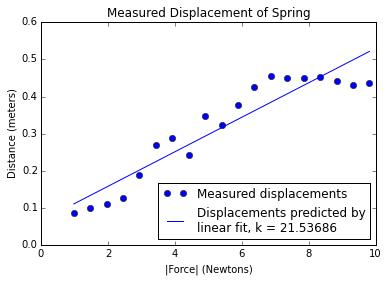

In [6]:
#Page 212, Figure 15.3
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo',
               label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
    #find linear fit
    a,b = pylab.polyfit(forces, distances, 1)
    
    predictedDistances = a*pylab.array(forces) + b
    
    # the spring constant, k
    k = 1.0/a
    
    pylab.plot(forces, predictedDistances,
               label = 'Displacements predicted by\nlinear fit, k = '
               + str(round(k, 5)))
   
    pylab.legend(loc = 'best')

fitData('springData.txt')
    

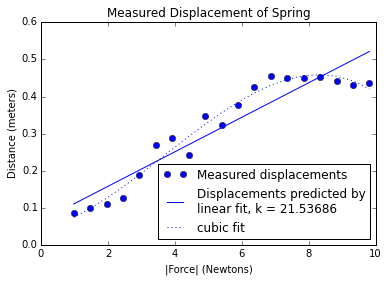

In [7]:
#Page 212, Figure 15.3
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo',
               label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
    #find linear fit
    a,b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*pylab.array(forces) + b
    
    # the spring constant, k
    k = 1.0/a
    
    pylab.plot(forces, predictedDistances,
               label = 'Displacements predicted by\nlinear fit, k = '
               + str(round(k, 5)))
   
    #add cubit fit
  
    a,b,c,d = pylab.polyfit(forces, distances, 3)
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    pylab.plot(forces, predictedDistances, 'b:', label = 'cubic fit')

    pylab.legend(loc = 'best')

fitData('springData.txt')
    

The cubic fit <b>looks like</b> a much better model of the data, but is it? <b>Probably not</b>.

The <b>raw data</b> merely an indication of <b>experimental error</b>. This can be dangerous.

Recall that we started with a theory that there should be <b>a linear relationship</b> between the x and y values, not
a cubic one.

Let’s see what happens if we use our cubic fit to predict where the point corresponding to <b>1.5kg</b> would lie.


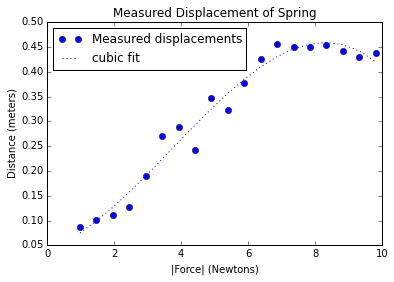

In [19]:
#Page 212, Figure 15.3
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo',
               label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
   
    #add cubit fit
    a,b,c,d = pylab.polyfit(forces, distances, 3)
    
     # 需要对 forces加一个元素：1.5*9.81 待改
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    pylab.plot(forces, predictedDistances, 'b:', label = 'cubic fit')

    pylab.legend(loc = 'best')

fitData('springData.txt')
    

we have is an example of <b>overfitting</b>.

we recall that <b>Hooke’s law</b> holds only up to some <b>elastic limit</b>. Perhaps that limit is reached for this spring somewhere around <b>7N</b> (approximately 0.7kg).

Let’s see what happens if we eliminate the last six points by replacing the second and third lines of fitData by

```python
distances = pylab.array(distances[:-6])
masses = pylab.array(masses[:-6])
```


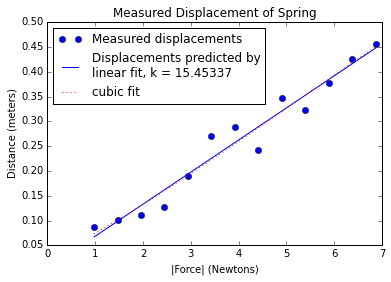

In [28]:
#Page 212, Figure 15.3
def fitData(inputFile):
    masses, distances = getData(inputFile)
    
    # we eliminate the last six points
    distances = pylab.array(distances[:-6])
    masses = pylab.array(masses[:-6])
        
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo',
               label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
    #find linear fit
    a,b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*pylab.array(forces) + b
    
    # the spring constant, k
    k = 1.0/a
    
    pylab.plot(forces, predictedDistances,
               label = 'Displacements predicted by\nlinear fit, k = '
               + str(round(k, 5)))
   
    #add cubit fit
  
    a,b,c,d = pylab.polyfit(forces, distances, 3)
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    pylab.plot(forces, predictedDistances, 'r:', label = 'cubic fit')

    pylab.legend(loc = 'best')

fitData('springData.txt')

Eliminating those points certainly makes a <b>difference</b>, e.g., k has dropped dramatically and the linear and cubic fits are almost  <b>indistinguishable</b>. 

But how do we know which of the two linear fits is a better representation of how our spring performs up to its elastic limit? 

One should never throw out experimental results <b>merely to get a better fit</b>. 


## 15.2 The Behavior of Projectiles

## 15.3 Fitting Exponentially Distributed Data 

## 15.4 When Theory Is Missing